# Task 1

## A. Preparation

In [1]:
import pandas as pd
import numpy as np

from sklearn import preprocessing

from sklearn import svm
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.feature_selection import RFE

from sklearn.model_selection import train_test_split

In [2]:
df = pd.read_csv("./winequality_red.csv")
df.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


In [3]:
df.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000
mean,8.319637,0.527821,0.270976,2.538806,0.087467,15.874922,46.467792,0.996747,3.311113,0.658149,10.422983,5.636023
std,1.741096,0.179060,0.194801,1.409928,0.047065,10.460157,32.895324,0.001887,0.154386,0.169507,1.065668,0.807569
min,4.600000,0.120000,0.000000,0.900000,0.012000,1.000000,6.000000,0.990070,2.740000,0.330000,8.400000,3.000000
25%,7.100000,0.390000,0.090000,1.900000,0.070000,7.000000,22.000000,0.995600,3.210000,0.550000,9.500000,5.000000
50%,7.900000,0.520000,0.260000,2.200000,0.079000,14.000000,38.000000,0.996750,3.310000,0.620000,10.200000,6.000000
75%,9.200000,0.640000,0.420000,2.600000,0.090000,21.000000,62.000000,0.997835,3.400000,0.730000,11.100000,6.000000
max,15.900000,1.580000,1.000000,15.500000,0.611000,72.000000,289.000000,1.003690,4.010000,2.000000,14.900000,8.000000


In [4]:
# target attribute
target_name = 'quality'
target = df[target_name]

# predictor attributes
predictors = df.drop(target_name, axis=1).values

In [5]:
# pepare independent stratified data sets for training and test of the final model
predictors_train, predictors_test, target_train, target_test = train_test_split(
    predictors, target, test_size=0.20, shuffle=True, stratify=target)

In [6]:
min_max_scaler = preprocessing.MinMaxScaler()
predictors_train = min_max_scaler.fit_transform(predictors_train)
predictors_test = min_max_scaler.fit_transform(predictors_test)

## B. Feature Selection

#### 1. Apply RFE with SVM for selecting the best features

In [7]:
# create a base classifier used to evaluate a subset of attributes
estimatorSVM = svm.SVR(kernel="linear")
selectorSVM = RFE(estimatorSVM, 3)
selectorSVM = selectorSVM.fit(predictors_train, target_train)
# summarize the selection of the attributes
print(selectorSVM.support_)
print(selectorSVM.ranking_)

[False  True False False False False False False False  True  True]
[5 1 9 4 2 7 3 6 8 1 1]


#### 2. Apply RFE with Logistic Regression for selecting the best features

In [8]:
# create a base classifier used to evaluate a subset of attributes
estimatorLR = LogisticRegression(solver = 'lbfgs', multi_class='auto')
# create the RFE model and select 3 attributes
selectorLR = RFE(estimatorLR, 3)
selectorLR = selectorLR.fit(predictors_train, target_train)
# summarize the selection of the attributes
print(selectorLR.support_)
print(selectorLR.ranking_)

[False  True False False False False False False False  True  True]
[3 1 6 5 7 8 2 4 9 1 1]


## B. Evaluate on the Test Data Set
Apply the selectors to prepare training data sets only with the selected features
Note: The same selectors are applied to the test data set. However, it is important that the test data set was not used by (it's invisible to) the selectors.

In [9]:
predictors_train_SVMselected = selectorSVM.transform(predictors_train)
predictors_test_SVMselected = selectorSVM.transform(predictors_test)

In [10]:
predictors_train_LRselected = selectorLR.transform(predictors_train)
predictors_test_LRselected = selectorLR.transform(predictors_test)

### Train and evaluate SVM classifiers with both the selected features and all features 

Here we train three models:
* model1 - with the features selected by SVM
* model2 - with the features selected by Logistic Regression
* model3 - with all features (i.e. without feature selection)

In [11]:
classifier = svm.SVC(gamma='scale')

In [12]:
model1 = classifier.fit(predictors_train_SVMselected, target_train)
model1.score(predictors_test_SVMselected, target_test)

0.571875

In [13]:
model2 = classifier.fit(predictors_train_LRselected, target_train)
model2.score(predictors_test_LRselected, target_test)

0.571875

In [14]:
model3 = classifier.fit(predictors_train, target_train)
model3.score(predictors_test, target_test)

0.584375

## C. Conclusion

When you execute this code again, it is very likely to get different results.

To get more accurate results, accounting for the variance in the results, it is better to run the whole experiment multiple times and measure the variance in the results. Then pick the model that gives better results.

# Task 3: Loop de Loop and Pull

In [15]:
def task3():
    # pepare independent stratified data sets for training and test of the final model
    predictors_train, predictors_test, target_train, target_test = train_test_split(
    predictors, target, test_size=0.20, shuffle=True, stratify=target)
    
    # scale values
    min_max_scaler = preprocessing.MinMaxScaler()
    predictors_train = min_max_scaler.fit_transform(predictors_train)
    predictors_test = min_max_scaler.fit_transform(predictors_test)
    
    ### RFE with SVM ###
    # create a base classifier used to evaluate a subset of attributes
    estimatorSVM = svm.SVR(kernel="linear")
    selectorSVM = RFE(estimatorSVM, 3)
    selectorSVM = selectorSVM.fit(predictors_train, target_train)
    predictors_train_SVMselected = selectorSVM.transform(predictors_train)
    predictors_test_SVMselected = selectorSVM.transform(predictors_test)
    
    ### RFE with LR ###
    # create a base classifier used to evaluate a subset of attributes
    estimatorLR = LogisticRegression(solver = 'lbfgs', multi_class='auto')
    # create the RFE model and select 3 attributes
    selectorLR = RFE(estimatorLR, 3)
    selectorLR = selectorLR.fit(predictors_train, target_train)
    predictors_train_LRselected = selectorLR.transform(predictors_train)
    predictors_test_LRselected = selectorLR.transform(predictors_test)
    
    ### Train and Evaluate Classifiers ###
    classifier = svm.SVC(gamma='scale')
    
    model1 = classifier.fit(predictors_train_SVMselected, target_train)
    score_SVC = model1.score(predictors_test_SVMselected, target_test)
    
    model2 = classifier.fit(predictors_train_LRselected, target_train)
    score_LR = model2.score(predictors_test_LRselected, target_test)
    
    model3 = classifier.fit(predictors_train, target_train)
    score_NA = model3.score(predictors_test, target_test)
    
    return score_SVC, score_LR, score_NA

In [19]:
scores_SVC = np.array([])
scores_LR = np.array([])
scores_NA = np.array([])

for i in range(0,100):
    a, b, c = task3()
    scores_SVC = np.append(scores_SVC, a)
    scores_LR = np.append(scores_LR, b)
    scores_NA = np.append(scores_NA, c)

scores_df = pd.DataFrame(data={'SVC' : scores_SVC, 'Logistic Regression' : scores_LR, 'NA' : scores_NA})
scores_df.describe()

/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:758: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)
/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:758: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)
/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:758: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)
/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:758: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)
/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:758: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)
/anaconda3

,SVC,Logistic Regression,NA
count,100.000000,100.000000,100.000000
mean,0.568500,0.568563,0.570594
std,0.023938,0.022083,0.024308
min,0.503125,0.503125,0.484375
25%,0.556250,0.556250,0.553125
50%,0.568750,0.571875,0.571875
75%,0.584375,0.584375,0.587500
max,0.653125,0.612500,0.640625


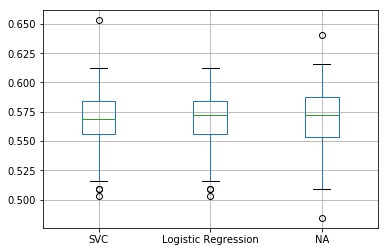

In [20]:
scores_df.boxplot()

## Conlclusion
After running 100 iterations of each feature selection method, it's clear that there isn't much between them. 

In fact, the highest average mean was held by using no feature selection at all! SVM achieved the highest max score, indicating it may have the most potential. Meanwhile, Logistic Regression has the lowest standard deviation, suggesting it's the most consistent. 

My instict would be to go for Logistic Regression as the best method here, but it's hard to say for sure.

# Task 4: Pipelines

In [67]:
from sklearn.pipeline import Pipeline
from sklearn.pipeline import make_pipeline
from sklearn.model_selection import GridSearchCV

df = pd.read_csv("./winequality_red.csv")
x=df.drop(['quality'],axis=1)
y=df['quality']

### SVM

In [31]:
steps = [('scaler', preprocessing.MinMaxScaler()), ('SVM', svm.SVC())]
pipeline = Pipeline(steps)

X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=30, stratify=y)

In [51]:
parameters = {'SVM__C':[0.001,0.1,10,100,10e5], 'SVM__gamma':[0.1,0.01]}

In [52]:
grid = GridSearchCV(pipeline, param_grid=parameters, cv=5)

In [38]:
grid.fit(X_train, y_train)
print("score = %3.2f" %(grid.score(X_test,y_test)))
print(grid.best_params_)

score = 0.61
{'SVM__C': 1000000.0, 'SVM__gamma': 0.1}


### Logistic Regression

In [91]:
pipeline = make_pipeline(preprocessing.MinMaxScaler(), LogisticRegression(solver='lbfgs', multi_class='auto'))

X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=30, stratify=y)

In [92]:
parameters = {'logisticregression__C':[0.001,0.1,10,100,1000,10e5]}

In [93]:
grid = GridSearchCV(pipeline, parameters, cv=5)

In [96]:
grid.fit(X_train, y_train)
print("score = %3.2f" %(grid.score(X_test,y_test)))
print(grid.best_params_)

/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:758: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)
/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:758: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)
/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:758: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)
/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:758: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)
/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:758: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)
/anaconda3

score = 0.59
{'logisticregression__C': 10}


/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:758: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)


## Conclusion

I used pipelines with SVM and Logistic Regression feature selection, and similar to my above results, there isn't a huge difference.

However, SVM did score slightly higher (0.61 vs 0.59) and so I would nominate that as the better model in this case. It is worth noting that the SVM version took much longer to run, compared with Logistic Regression, but I don't think that's enough of a reason to ignore the better results.

P.S. Please forgive the numerous ConvergenceWarnings, I did search this and some solutions were offered, but they also noted that it may just be a natural consequence of the data.